### **List down techniques used to handle missing data. Give an example of each with python code**.

In [134]:
import seaborn as sns
data = sns.load_dataset('titanic')
data.head(5)

df = data.copy()


**Checking for missing values**

In [135]:
import pandas as pd

missing_values = pd.DataFrame(data.isnull().sum(), columns=['missing_count'])
missing_values = missing_values.loc[missing_values['missing_count'] > 0]

missing_values['Total'] = data.shape[0]

missing_values

#conclusion is that age has 177 missing values and deck has 688 missing values

,missing_count,Total
age,177,891
embarked,2,891
deck,688,891
embark_town,2,891


**Dropping the missing values**

In [136]:
data.dropna()
print(f'Before the values were {current_shape}\nAfter dropping missing values {data.shape}')

Before the values were (891, 15)
After dropping missing values (891, 15)


In [137]:
data_drop = (100 - (data.shape[0] / current_shape[0])*100)
data_drop

0.0

***Dropping the missing values is not feasible since the data is becoming way to small that there is 80% of data drop so it is not the best way to handle missing values for this data set.***


<br>

### **Basically there are 3 ways that is frequently to handle the missing values**


**1)** **Mean**
**2)** **Median**
**3)** **Mode**


In [138]:
data.loc[data['age'].isnull()]


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


In [139]:
data['age_by_mean'] = data['age'].fillna(data['age'].mean())

<Axes: ylabel='age'>

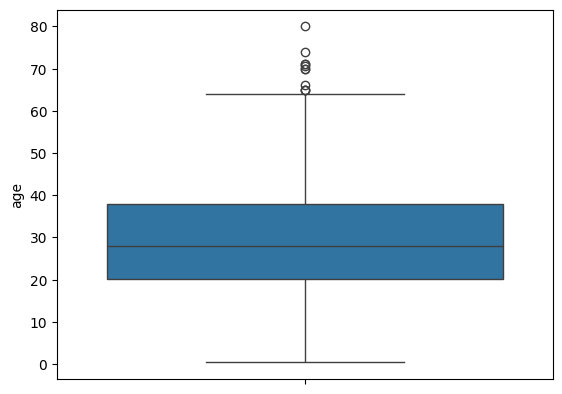

In [140]:
import seaborn as sns

sns.boxplot(data['age'])

In [141]:
age_outliers =  data.loc[(data['age'] > 65) & (data['age'] < 85)]
print(f'{age_outliers['age'].count()}, Average age : {data['age'].mean()}')

8, Average age : 29.69911764705882


<br>

**Use Median if outliers are present**

In [142]:
data['age_by_median'] = data['age'].fillna(data['age'].median())

data[['age_by_median','age']]

,age_by_median,age
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
...,...,...
886,27.0,27.0
887,19.0,19.0
888,28.0,NaN
889,26.0,26.0


***Mode Imputation for categorcial type of Data***

In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   survived       891 non-null    int64   
 1   pclass         891 non-null    int64   
 2   sex            891 non-null    object  
 3   age            714 non-null    float64 
 4   sibsp          891 non-null    int64   
 5   parch          891 non-null    int64   
 6   fare           891 non-null    float64 
 7   embarked       889 non-null    object  
 8   class          891 non-null    category
 9   who            891 non-null    object  
 10  adult_male     891 non-null    bool    
 11  deck           203 non-null    category
 12  embark_town    889 non-null    object  
 13  alive          891 non-null    object  
 14  alone          891 non-null    bool    
 15  age_by_mean    891 non-null    float64 
 16  age_by_median  891 non-null    float64 
dtypes: bool(2), category(2), float64(4)

In [144]:
data.isna().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [145]:
data['embarked_by_mode'] = data['embarked'].fillna(data['embarked'].mode()[0])
data['embark_town_mode'] = data['embark_town'].fillna(data['embark_town'].mode()[0])



In [146]:
data.drop(['age','embarked','deck','embark_town'], axis=1)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone,age_by_mean,age_by_median,embarked_by_mode,embark_town_mode
0,0,3,male,1,0,7.2500,Third,man,True,no,False,22.000000,22.0,S,Southampton
1,1,1,female,1,0,71.2833,First,woman,False,yes,False,38.000000,38.0,C,Cherbourg
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True,26.000000,26.0,S,Southampton
3,1,1,female,1,0,53.1000,First,woman,False,yes,False,35.000000,35.0,S,Southampton
4,0,3,male,0,0,8.0500,Third,man,True,no,True,35.000000,35.0,S,Southampton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True,27.000000,27.0,S,Southampton
887,1,1,female,0,0,30.0000,First,woman,False,yes,True,19.000000,19.0,S,Southampton
888,0,3,female,1,2,23.4500,Third,woman,False,no,False,29.699118,28.0,S,Southampton
889,1,1,male,0,0,30.0000,First,man,True,yes,True,26.000000,26.0,C,Cherbourg


<br>

**Advance method to fill missing values**

**KNN Imputer**

In [147]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [149]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
df['age_by_knnImputer'] = imputer.fit_transform(df[['age']])[:, 0]



In [153]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_by_knnImputer
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.0


**Iterative Imputer**

https://github.com/utkarshg1/PWSkills-Assignments/blob/main/Assignment%2041%20-%2017%20March%202023/Assignment41Utkarsh.ipynb

In [223]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

itr_imputer = IterativeImputer(max_iter=10, random_state=43)
df['age_by_iterativeImputer'] = itr_imputer.fit_transform(df[['age']])[:, 0]


KeyError: "None of [Index(['age'], dtype='object')] are in the [columns]"

In [158]:
df.drop(['age'], axis=1)

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_by_knnImputer,age_by_iterativeImputer
0,0,3,male,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.000000,22.000000
1,1,1,female,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.000000,38.000000
2,1,3,female,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.000000,26.000000
3,1,1,female,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.000000,35.000000
4,0,3,male,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.000000,35.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,27.000000,27.000000
887,1,1,female,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,19.000000,19.000000
888,0,3,female,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,29.699118,29.699118
889,1,1,male,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,26.000000,26.000000


<br>

## **Up-sampling and Down-sampling**

<br>

### **Up-Sampling**

In [175]:
from sklearn.datasets import make_classification
import pandas as pd
import matplotlib.pyplot as plt


X,y = make_classification(n_samples = 1000,
                          n_features = 2,
                          n_redundant=0,
                          n_clusters_per_class = 1,
                          weights = [0.80],
                          random_state = 12)

X

array([[-1.26735911,  0.77903277],
       [-1.07543571, -1.0511621 ],
       [-0.61011459, -0.90980157],
       ...,
       [-1.32643852, -1.815178  ],
       [-0.83348573, -0.5146474 ],
       [-0.30287558, -0.57597532]])

In [176]:
df = pd.DataFrame(X, columns=['f1', 'f2'])
df['target'] = y

In [177]:
df['target'].value_counts()

,count
target,
0,800
1,200


***Upsampling begins***

In [178]:
majority_class = df[df['target'] == 0]
minority_class = df[df['target'] == 1]

In [179]:
majority_class.shape, minority_class.shape

((800, 3), (200, 3))

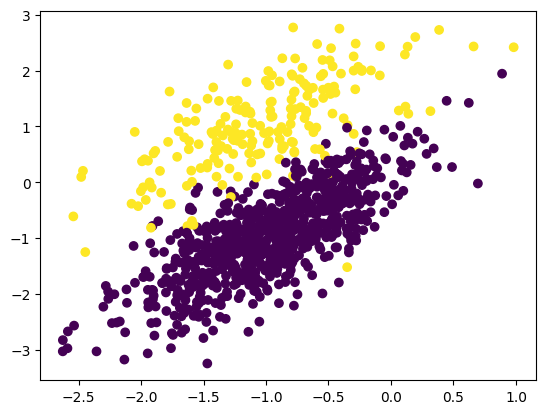

In [180]:
plt.scatter(df['f1'], df['f2'], c=df['target'])

In [182]:
# Upsampling

from sklearn.utils import resample

df_minority_upsampled = resample(
    minority_class,
    replace = True,
    n_samples = len(majority_class),
    random_state = 340,
)

In [183]:
df_minority_upsampled.shape

(800, 3)

In [184]:
df = pd.concat([majority_class, df_minority_upsampled]).reset_index(drop=True)

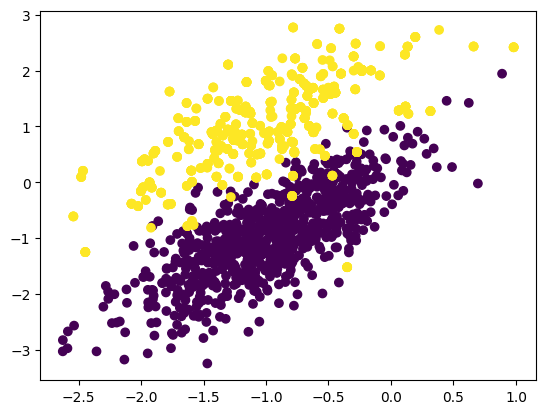

In [188]:
plt.scatter(df['f1'], df['f2'], c=df['target'])

<br>

## **DownSampling**

***To Downsample the dataset***

In [189]:
from sklearn.datasets import make_classification

X,y = make_classification(n_samples = 1000,
                          n_redundant = 0,
                          n_clusters_per_class = 1,
                          n_features = 2,
                          weights = [0.8],
                          random_state = 229
                          )

In [194]:
df = pd.DataFrame(X, columns = ['f1', 'f2'])
df['t'] = y
df

,f1,f2,t
0,-1.530120,-0.939897,1
1,-1.555676,0.741501,0
2,-2.106253,-0.772606,1
3,-2.040782,2.049532,0
4,-0.196920,0.063501,0
...,...,...,...
995,-1.441486,0.700567,0
996,-1.187624,0.698218,0
997,-0.540421,-1.045030,1
998,-1.423043,1.548843,0


In [195]:
df['t'].value_counts()

,count
t,
0,800
1,200


In [196]:
majority_class = df[df['t']==0]
minority_class = df[df['t']==1]

In [199]:
from sklearn.utils import resample

majority_class_downsampled = resample(majority_class,
                                     replace = False,
                                     random_state = 340,
                                     n_samples = len(minority_class)
                                     )

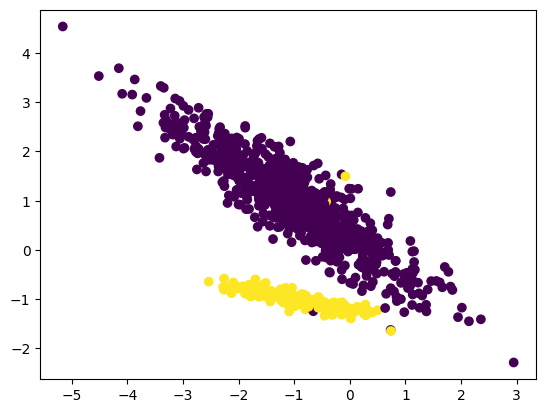

In [202]:
plt.scatter(df['f1'], df['f2'], c=df['t'])

In [205]:
df = pd.concat([minority_class, majority_class_downsampled]).reset_index(drop=True)

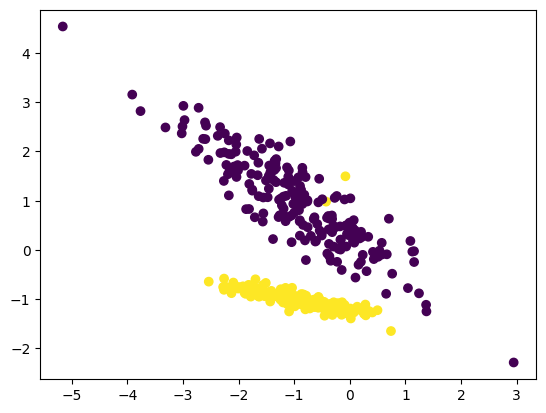

In [206]:
plt.scatter(df['f1'], df['f2'], c=df['t'])

<br>

## **SMOTE**

In [208]:
from sklearn.datasets import make_classification

X,y = make_classification(n_samples = 1000,
                          n_features = 2,
                          n_redundant = 0,
                          weights = [0.8],
                          n_clusters_per_class = 1,
                          random_state = 42
                          )

In [209]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(X, columns = ['f1', 'f2'])
df['t'] = y

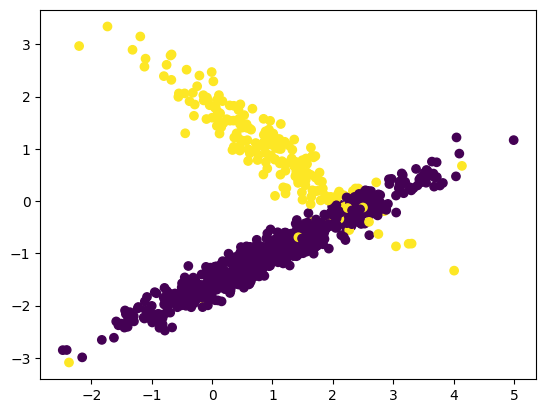

In [212]:
plt.scatter(df['f1'], df['f2'], c=df['t'])

In [214]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()

X, y = oversample.fit_resample(df[['f1', 'f2']], df['t'])

In [215]:
X.shape, y.shape

((1592, 2), (1592,))

In [217]:
len(y[y==0]) , len(y[y==1])

(796, 796)

In [218]:
over_sample  = pd.DataFrame(X, columns = ['f1', 'f2'])
over_sample['t'] = y

In [220]:
over_sample['t'].value_counts()

,count
t,
0,796
1,796


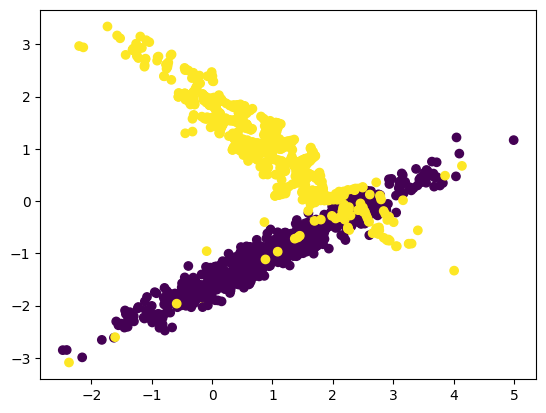

In [222]:
plt.scatter(over_sample['f1'], over_sample['f2'], c=over_sample['t'])